In [1]:
import numpy as np

In [60]:
x = 3

In [71]:
a = np.arange(-2,2,1/3.0)
a

array([-2.00000000e+00, -1.66666667e+00, -1.33333333e+00, -1.00000000e+00,
       -6.66666667e-01, -3.33333333e-01, -4.44089210e-16,  3.33333333e-01,
        6.66666667e-01,  1.00000000e+00,  1.33333333e+00,  1.66666667e+00])

In [72]:
a = a.reshape(-1,1)
a

array([[-2.00000000e+00],
       [-1.66666667e+00],
       [-1.33333333e+00],
       [-1.00000000e+00],
       [-6.66666667e-01],
       [-3.33333333e-01],
       [-4.44089210e-16],
       [ 3.33333333e-01],
       [ 6.66666667e-01],
       [ 1.00000000e+00],
       [ 1.33333333e+00],
       [ 1.66666667e+00]])

In [73]:
b = x * a
b

array([[-6.00000000e+00],
       [-5.00000000e+00],
       [-4.00000000e+00],
       [-3.00000000e+00],
       [-2.00000000e+00],
       [-1.00000000e+00],
       [-1.33226763e-15],
       [ 1.00000000e+00],
       [ 2.00000000e+00],
       [ 3.00000000e+00],
       [ 4.00000000e+00],
       [ 5.00000000e+00]])

In [74]:
noise = np.random.randn(*a.shape)
noise

array([[ 0.864728  ],
       [ 0.19464606],
       [ 2.3462662 ],
       [-0.33254676],
       [-0.01069074],
       [-0.27949154],
       [-1.44743942],
       [ 0.10651468],
       [-0.6480443 ],
       [-2.05654794],
       [ 1.41783345],
       [-0.56400573]])

In [75]:
b = x*a + noise
b

array([[-5.135272  ],
       [-4.80535394],
       [-1.6537338 ],
       [-3.33254676],
       [-2.01069074],
       [-1.27949154],
       [-1.44743942],
       [ 1.10651468],
       [ 1.3519557 ],
       [ 0.94345206],
       [ 5.41783345],
       [ 4.43599427]])

In [76]:
U, S, VT = np.linalg.svd(a, full_matrices=False)
print(S, "S")
print(VT, "VT")
print(U,"U")

[4.02768199] S
[[1.]] VT
[[-4.96563533e-01]
 [-4.13802944e-01]
 [-3.31042355e-01]
 [-2.48281767e-01]
 [-1.65521178e-01]
 [-8.27605889e-02]
 [-1.10259254e-16]
 [ 8.27605889e-02]
 [ 1.65521178e-01]
 [ 2.48281767e-01]
 [ 3.31042355e-01]
 [ 4.13802944e-01]] U


In [77]:
S = np.diag(S)
S_inv = np.linalg.inv(S)
print(S, "S")
print(S_inv, "S_inv")

[[4.02768199]] S
[[0.24828177]] S_inv


In [85]:
X_tilde1 = VT.T @ S_inv @ U.T @ b
X_tilde1

array([[2.61460146]])

In [82]:
X_tilde2 = np.linalg.pinv(a) @ b
X_tilde2

array([[2.61460146]])

/home/usv/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  
/home/usv/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  This is separate from the ipykernel package so we can avoid doing imports until
/home/usv/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  after removing the cwd from sys.path.
/home/usv/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  """


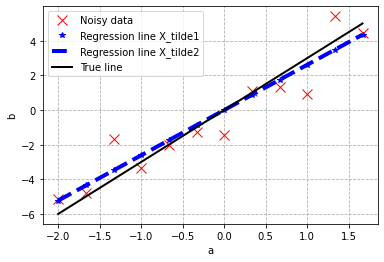

In [88]:
import matplotlib.pyplot as plt
plt.plot(a, b, 'x', Color='r', MarkerSize = 10, label='Noisy data') # Noisy measurements
plt.plot(a,X_tilde1 * a,'*',Color='b',LineWidth=4, label='Regression line X_tilde1')
plt.plot(a,X_tilde2 * a,'--',Color='b',LineWidth=4, label='Regression line X_tilde2')
plt.plot(a, x*a, Color='k', LineWidth=2, label='True line') # True relationship
plt.xlabel('a')
plt.ylabel('b')

plt.grid(linestyle='--')
plt.legend()
plt.show()


/home/usv/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  """Entry point for launching an IPython kernel.


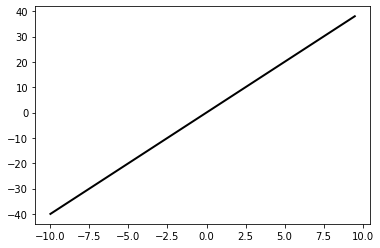

In [13]:
plt.plot(a, x*a, Color='k', LineWidth=2, label='True line') # True relationship


In [28]:
U,S,VT = np.linalg.svd(a, full_matrices=False)
print(VT)
print(S)

[[1.]]
[36.53765181]


In [29]:
S = np.diag(S)
S

array([[36.53765181]])

In [33]:
x_tilde = VT.T @ np.linalg.inv(S) @ U.T @ b
x_tilde

array([[3.95685246]])

/home/usv/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  """Entry point for launching an IPython kernel.


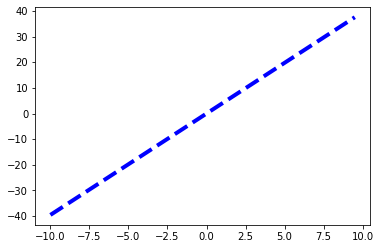

In [34]:
plt.plot(a,x_tilde * a,'--',Color='b',LineWidth=4, label='Regression line')
